# Cooperation Fixation In Hierarchical Groups

In [3]:
# import necessary packages
import random as rd
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import gridspec
import scipy.stats as st
import networkx as nx
import itertools
import matplotlib as mpl

#Graph proprieties
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

## Game Matrix

In [5]:
# Prisonner's dilemma matrices. MatriceSup and MatriceInf correspond to asymetruc matrices 
#but only MatriceSup will be used for this study

MatriceSup = [[6,18],[0,12]] #[D vs [D, C],C vs [D, C]]
MatriceInf = [[4,12],[0,8]] #[D vs [D, C],C vs [D, C]]

## Game strategies

In [6]:
def strat_coop():
    ''' function that always return a cooperative choice'''
    return 1

def strat_def():
    ''' function that always return a defector choice'''
    return 0

def distrib_strat_rd(n, prop) :
    ''' function that distribute randomly the strategies in the population
    with prop the proportion of cooperators '''
    Strat = [strat_coop]*n
    
    for i in range (n) :
        if rd.random() > prop :
            Strat[i] = strat_def
    return Strat

def distrib_strat_hierarchy(n, degres_interaction, strat_DOM, prop = 0.5) :
    ''' function that distribute the strategies in the population
    depending on their interaction degree '''
    #we give the other strategy to the dominated individuals
    strat_dom = strat_coop
    if strat_dom == strat_DOM :
        strat_dom = strat_def

    # sorting of the individuals from higher interactions degree to lower interactions degree
    sorted_df = pd.DataFrame({'deg' : degres_interaction}).sort_values(by=["deg"], ascending = False)

    Strat = strat_DOM
    Strat0 = [0]*n
    n_dominants = 0

    for individual in sorted_df.iterrows() :

        # when we arrive to the wanted number of dominants, we switch to the other strategy
        if n_dominants == prop*n :
            Strat = strat_dom

        # We give the right strategy to the individual
        Strat0[individual[0]] = Strat
        n_dominants += 1
    return Strat0

def get_distribution(distrib_name, prop, n, interaction_degree):
    ''' function that return the initial distribution of strategies, 
    depending on s the type of distribution, prop the proportion of dominants or cooperators (depending on the method)'''
    Strat0 = []
    if distrib_name == "StratRD" : 
        Strat0 = distrib_strat_rd(n, prop)
    elif distrib_name == "Stratd" : 
        Strat0 = distrib_strat_hierarchy(n, interaction_degree, strat_def,  prop = prop)
    elif distrib_name == "StratD" :
        Strat0 = distrib_strat_hierarchy(n, interaction_degree, strat_coop,  prop = prop)
    return Strat0

# Graphs creation

## Real graphs

We create the adjency matrices of the real interaction graphs, taken from Voelkl et al. (2009)

In [7]:
real_graph_adj_1=[[0,12,5,0,13,7,9,3,7,0,12,0],[0,0,3,0,3,3,4,3,2,0,3,0],[0,0,0,3,1,3,2,4,0,0,3,0],[0,0,0,0,0,4,1,14,0,0,10,0],[0,0,0,0,0,15,11,5,5,3,2,7],[0,0,0,0,0,0,16,8,2,2,24,3],[0,0,0,0,0,0,0,4,5,2,11,4],[0,0,0,0,0,0,0,0,7,3,23,1],[0,0,0,0,0,0,0,0,0,5,1,0],[0,0,0,0,0,0,0,0,0,0,2,0],[0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0]]
real_graph_adj_2=[[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,3,0,0,0,0,1,0,0,0,0],[1,1,2,0,0,0,0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,1,0,0,1,1,0,0,0,0],[1,0,0,2,0,0,2,1,0,1,0,0,0,0,0],[1,0,0,0,2,2,0,0,0,0,0,0,0,0,0],[1,0,0,0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,1,0,0,0,1,0],[0,0,1,0,0,1,0,0,1,0,0,0,0,0,0],[0,0,2,1,1,1,0,0,0,1,0,1,0,0,0],[0,0,0,2,0,0,3,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,1,1,0,0,0,0],[0,0,0,0,1,0,0,1,0,0,0,0,0,0,0]]
real_graph_adj_3=[[0,0,3,2,3,1,0,1],[0,0,4,3,3,0,0,0],[1,3,0,1,0,0,0,0],[6,6,0,0,1,1,0,1],[10,5,2,7,0,1,0,2],[0,1,0,0,0,0,3,0],[1,3,0,2,0,28,0,0],[14,0,2,6,0,0,0,0]]
real_graph_adj_4=[[0,1,3,0,0,3,0],[1,0,0,2,1,1,5],[3,0,0,0,1,7,1],[0,2,0,0,6,1,1],[0,1,1,6,0,4,2],[3,1,7,1,4,0,3],[0,5,1,1,2,3,0]]
real_graph_adj_5=[[0,54,57,9,470,167,0,0,0,0],[59,0,164,111,16,231,81,0,0,1],[104,49,0,38,73,0,0,0,0,0],[0,6,193,0,340,54,0,0,0,0],[70,0,86,252,0,54,14,4,0,14],[154,124,0,68,75,0,69,109,0,51],[0,290,47,13,275,186,0,49,0,14],[0,102,359,67,391,181,99,0,0,0],[0,0,7,0,0,0,13,0,0,0],[0,207,15,0,213,476,212,287,0,0]]
real_graph_adj_6=[[0,0,112,15,74,29,110,0,72],[0,0,113,58,204,8,85,2,38],[126,152,0,34,23,58,44,10,22],[7,27,20,0,24,60,26,0,8],[86,113,26,35,0,47,39,6,60],[39,18,67,37,58,0,84,108,56],[109,44,29,22,26,73,0,22,4],[0,8,30,0,6,75,34,0,13],[37,5,11,0,37,20,1,2,0]]

real_graph_adj=[real_graph_adj_1,real_graph_adj_2,real_graph_adj_3,real_graph_adj_4,real_graph_adj_5,real_graph_adj_6]

In [6]:
pandas_real_graph_adj_1 = pd.DataFrame(real_graph_adj_1)
pandas_real_graph_adj_2 = pd.DataFrame(real_graph_adj_2)
pandas_real_graph_adj_3 = pd.DataFrame(real_graph_adj_3)
pandas_real_graph_adj_4 = pd.DataFrame(real_graph_adj_4)
pandas_real_graph_adj_5 = pd.DataFrame(real_graph_adj_5)
pandas_real_graph_adj_6 = pd.DataFrame(real_graph_adj_6)

#print(pandas_real_graph_adj_4)

   0  1  2  3  4  5  6
0  0  1  3  0  0  3  0
1  1  0  0  2  1  1  5
2  3  0  0  0  1  7  1
3  0  2  0  0  6  1  1
4  0  1  1  6  0  4  2
5  3  1  7  1  4  0  3
6  0  5  1  1  2  3  0


We convert adjency matrices to networkx graphs

In [7]:
#Networkx graphs
real_graph_1 = nx.from_pandas_adjacency(pandas_real_graph_adj_1)
real_graph_2 = nx.from_pandas_adjacency(pandas_real_graph_adj_2)
real_graph_3 = nx.from_pandas_adjacency(pandas_real_graph_adj_3)
real_graph_4 = nx.from_pandas_adjacency(pandas_real_graph_adj_4)
real_graph_5 = nx.from_pandas_adjacency(pandas_real_graph_adj_5)
real_graph_6 = nx.from_pandas_adjacency(pandas_real_graph_adj_6)


#List of graphs 
real_graph=[real_graph_1,real_graph_2,real_graph_3,real_graph_4,real_graph_5,real_graph_6]
#print(real_graph)

[<networkx.classes.graph.Graph object at 0x000001C873B80DF0>, <networkx.classes.graph.Graph object at 0x000001C873B80E80>, <networkx.classes.graph.Graph object at 0x000001C873B81330>, <networkx.classes.graph.Graph object at 0x000001C873B3BF40>, <networkx.classes.graph.Graph object at 0x000001C873B81270>, <networkx.classes.graph.Graph object at 0x000001C873B80EB0>]


### Visualisation

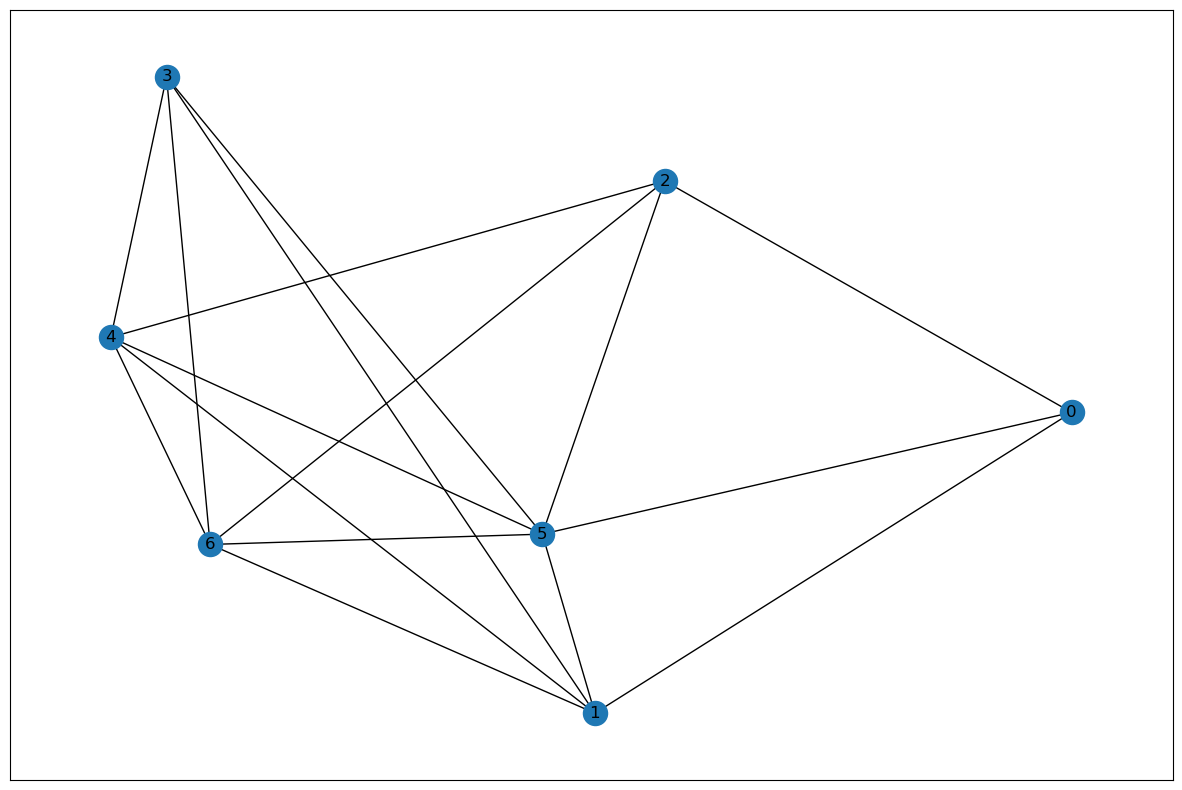

In [8]:
plt.figure(1,figsize=(15,10)) 
pos=nx.fruchterman_reingold_layout(real_graph[4])
nx.draw_networkx(real_graph_4,pos=pos)

We export graphs to graphml files 

In [9]:
nx.write_graphml(real_graph_1,"real_graph_1.graphml")
nx.write_graphml(real_graph_2,"real_graph_2.graphml")
nx.write_graphml(real_graph_3,"real_graph_3.graphml")
nx.write_graphml(real_graph_4,"real_graph_4.graphml")
nx.write_graphml(real_graph_5,"real_graph_5.graphml")
nx.write_graphml(real_graph_6,"real_graph_6.graphml")

### Degree of graphs

In [10]:
degrees=[]
for g in range(0,len(real_graph)):
    degrees.append(real_graph[g].degree())
    degrees[g]=list(itertools.chain(*degrees[g]))
    degrees[g]=[degrees[g][i] for i in range (1,len(degrees[g]),2)]
    print(degrees[g])

[8, 8, 8, 5, 10, 11, 11, 11, 8, 6, 10, 4]
[4, 1, 4, 6, 4, 7, 4, 4, 2, 6, 7, 3, 1, 3, 2]
[6, 5, 5, 7, 6, 5, 4, 4]
[3, 5, 4, 4, 5, 6, 5]
[5, 8, 8, 7, 8, 7, 8, 7, 2, 6]
[6, 7, 8, 7, 8, 8, 8, 6, 8]


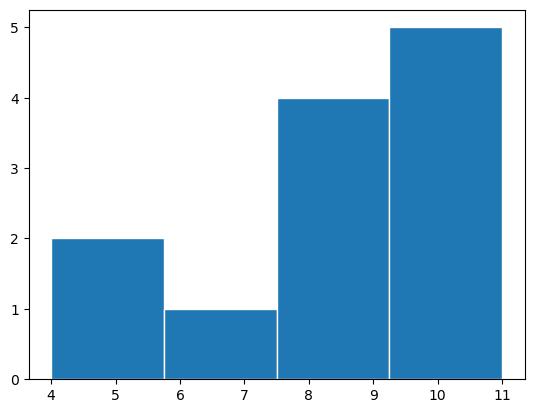

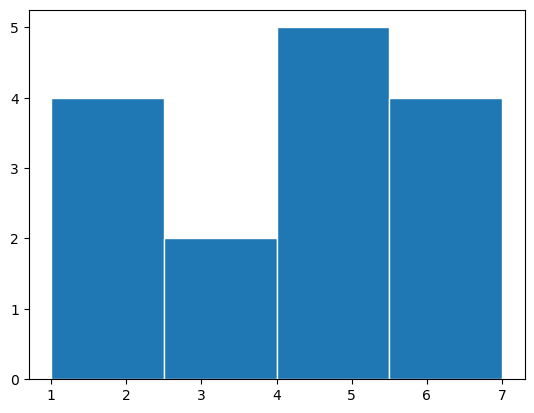

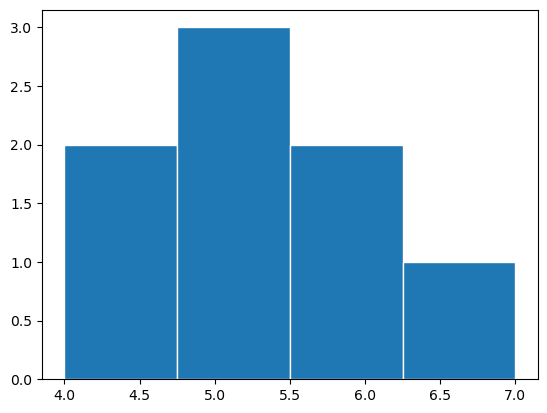

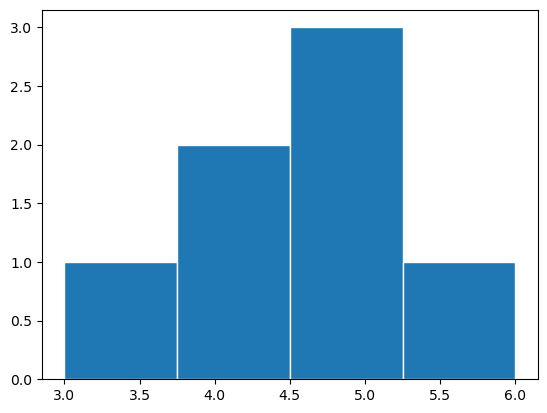

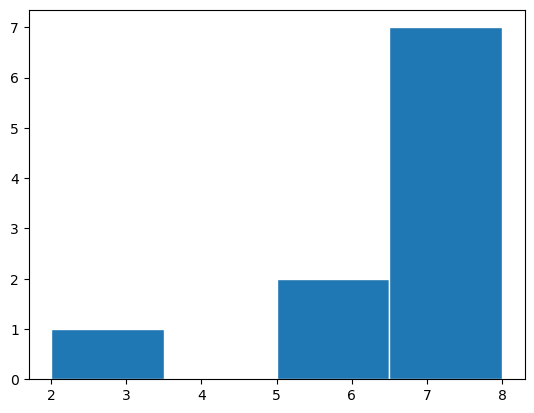

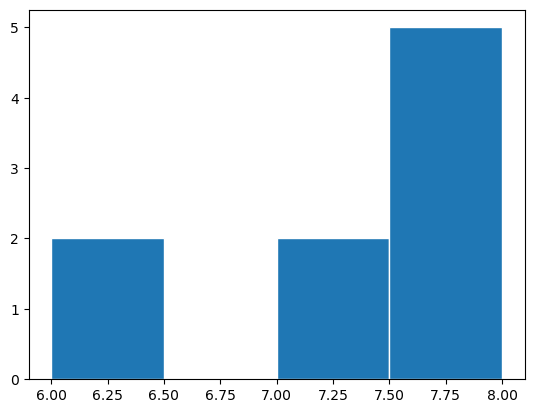

In [11]:
#Degree distribution in  graphs
for i in range(len(real_graph)):
    plt.hist(degrees[i], 4 ,edgecolor = 'white')
    plt.show()

## Constructed graphs

In [8]:
n=20 #size of the graphs

### Complete graph

In [9]:
graphcomplet = [[1]*n]*n
complete_graph = nx.complete_graph(20)
nx.write_graphml(complete_graph,"complete_graph.graphml")

### Configuration model with bimodal distribution

In [10]:
config_graph=[]
for k in range(20):
    sequence = [19 for i in range(10)]+[k+1 for i in range(10)] #create a list of 20, 10 vertces with an expected degree of 19 
#(dominant) individuals and 10 with a degree beteen 1 and 11 (dominated individuals)
    g=nx.configuration_model(sequence)
    while nx.number_connected_components(g)>1: 
        g=nx.configuration_model(sequence)     
    config_graph.append(g)
    config_graph[k] = nx.Graph(config_graph[k])
    config_graph[k].remove_edges_from(nx.selfloop_edges(config_graph[k]))

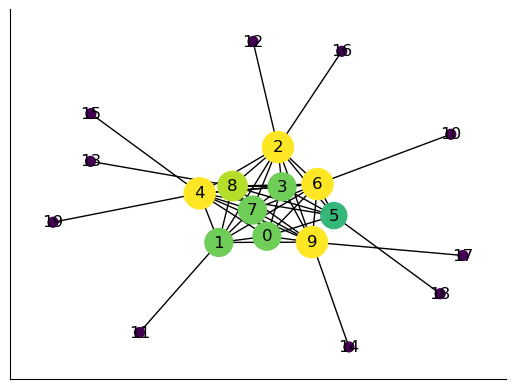

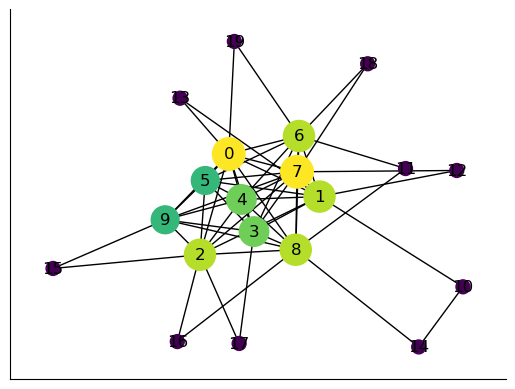

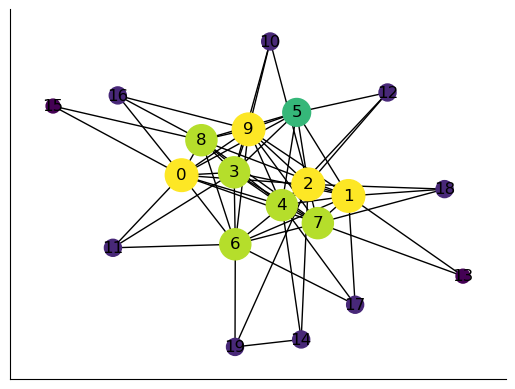

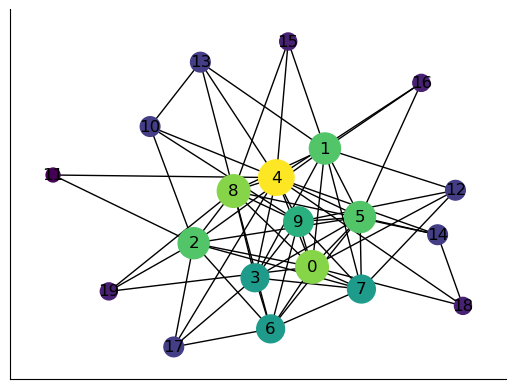

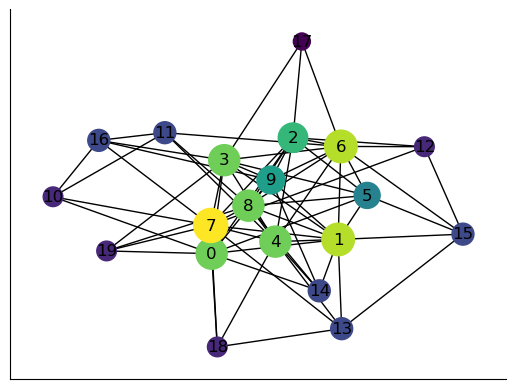

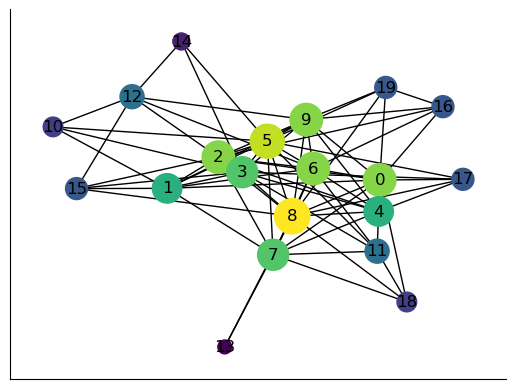

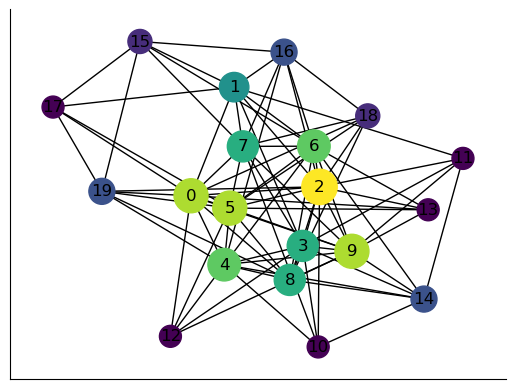

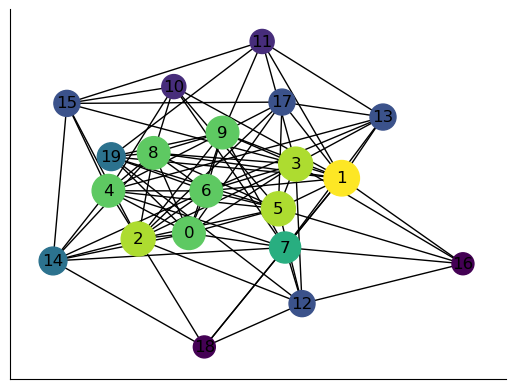

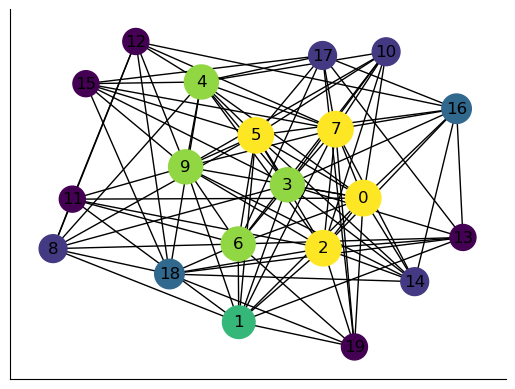

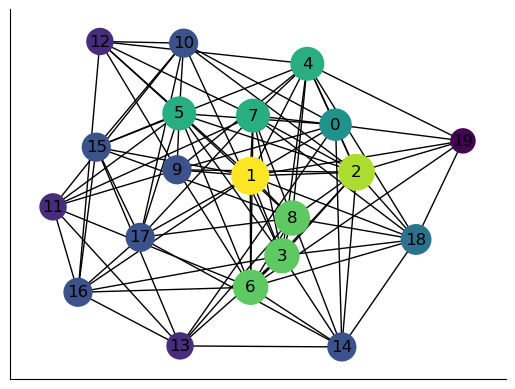

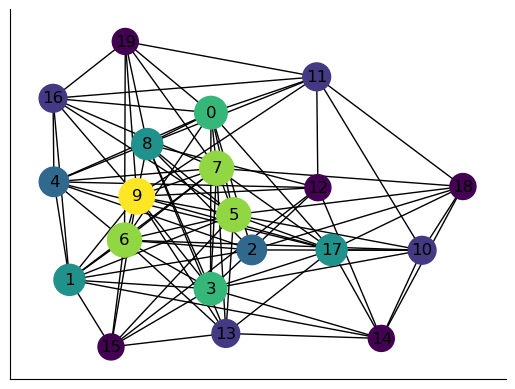

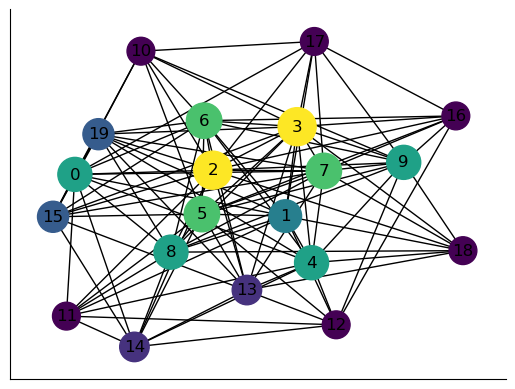

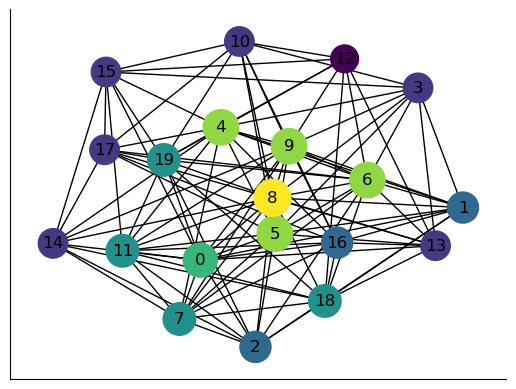

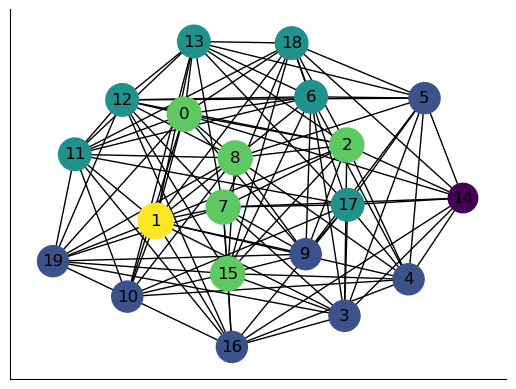

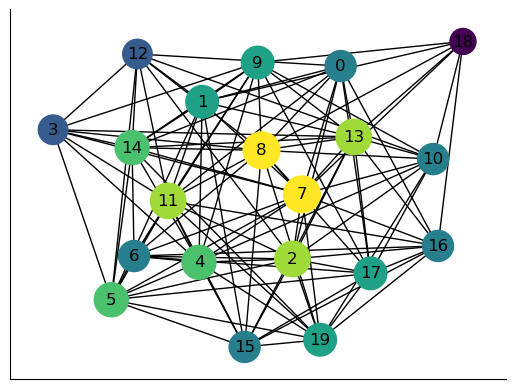

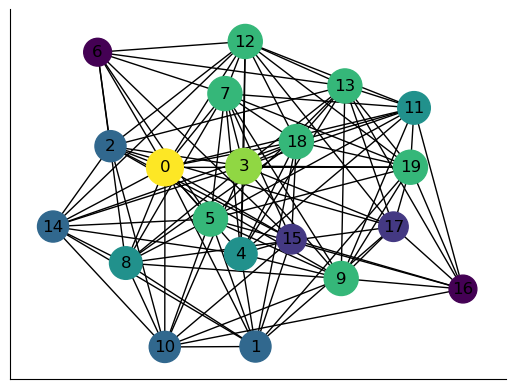

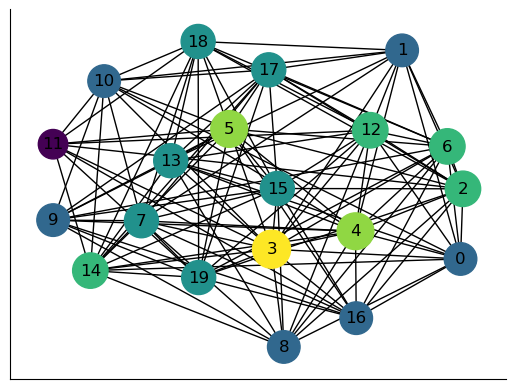

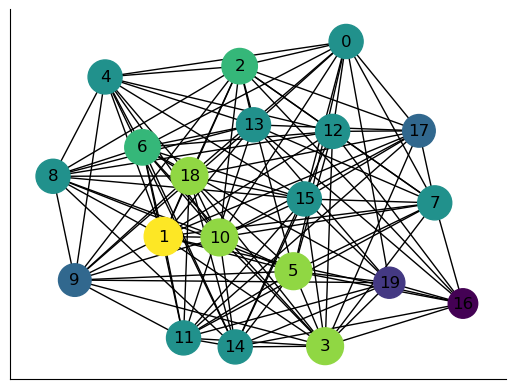

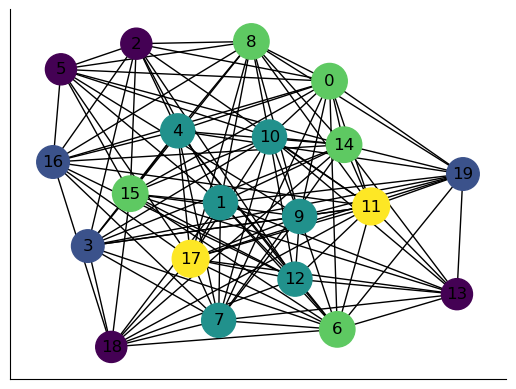

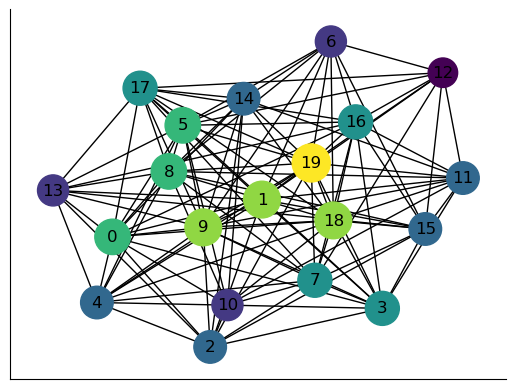

In [11]:
#Visualition 
for k in range (len(config_graph)):
    pos=nx.fruchterman_reingold_layout(config_graph[k])
    fig, ax = plt.subplots()
    degrees = config_graph[k].degree() #Dict with Node ID, Degree
    nodes = config_graph[k].nodes()
    n_color = np.asarray([degrees[n] for n in nodes]) # coloration by degree
    sc = nx.draw_networkx(config_graph[k], pos, nodelist=nodes, node_color=n_color, cmap='viridis', ax=ax, node_size=n_color*50)

We extract the adjency matrix of each of these graphs

In [12]:
ADJ_MATRIX=[]
for k in range(len(config_graph)):
    ADJ_MATRIX.append(nx.to_numpy_array(config_graph[k]))
print(ADJ_MATRIX[0].tolist())

[[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0], [1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 

We choose matrices with a degree of dominated individuals of 1,5 and 9

In [13]:
domine1ami = ADJ_MATRIX[0].tolist()
domine5amis = ADJ_MATRIX[4].tolist()
domine9amis = ADJ_MATRIX[8].tolist()
print(domine5amis)

[[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0], [1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0], [0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0], [0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 

In [21]:
#Function to have interaction degrees of a graph
def get_interaction_degree(graph) :
    return np.sum(np.array(graph), 1)

# Prisonner's dilemma game with graphs

In [ ]:
# Function to get the "hierrchy paramater" H 
def getH(InteractionGraph):
    sorted_df = pd.DataFrame({'deg' : get_interaction_degree(InteractionGraph)}).sort_values(by=["deg"], ascending = False)
    sorted_df['index_sorted'] = [i for i in range(len(sorted_df))]
    DOM_df = sorted_df[sorted_df['index_sorted'] >= len(sorted_df)/2]['deg'].mean()
    dom_df = sorted_df[sorted_df['index_sorted'] < len(sorted_df)/2]['deg'].mean()
    H = DOM_df/dom_df
    return H

In [14]:
# n = 20, defined before
GainMatrix = MatriceSup
Strat0 =distrib_strat_rd(n, 0.5)
InteractionGraph = graphcomplet

In [15]:
def GetPopGain(n, GainMatrix, InteractionGraph, Strat) :
    
    # Initialisation
    Indiv = [i for i in range(n)]
    GainResultsMatrix = np.array([[0]*n]*n)
    
    # For each arrengement of 2 individuals
    for IndivA in Indiv :
        for IndivB in Indiv[(IndivA+1):] :
            
            # n iterations in ine meeting
            nb_rencontres = InteractionGraph[IndivA][IndivB]
            if nb_rencontres == 0:
                continue 
                
            # GAME
            # Theindividuals plays depending on their strategy
            choix_A = Strat[IndivA]() 
            choix_B = Strat[IndivB]()  

            # calculation of their gains
            Gain_A = GainMatrix[choix_A][choix_B]*nb_rencontres 
            Gain_B = GainMatrix[choix_B][choix_A]*nb_rencontres 
            
            # we learn the total gains
            GainResultsMatrix[IndivA][IndivB] = Gain_A
            GainResultsMatrix[IndivB][IndivA] = Gain_B
    
    TotalGain = np.sum(GainResultsMatrix, axis=1)
    return TotalGain

array([ 48,  48, 174, 174,  48, 174,  48, 174, 174, 174, 174, 174, 174,
        48, 174, 174, 174, 174, 174, 174])

## Strategie changing

In [17]:
def GetNewStrat(InteractionGraph, strat_list, gain_list) :
    """ Function that change the strategy of one individual according to the best strategy of his neighboors"""
    
    # initialisation
    n = len(strat_list)
    stratnames = set(strat_list)
    new_start_list = strat_list.copy()

    # for one random individual in the population
    indiv = rd.choice([i for i in range(n)])

    # creation of a list of 0 et de 1 representating the individuals that have same strategy than the choosen individual
    strat_indiv = strat_list[indiv]
    same_strat = np.array(list(map(lambda x: int(x == strat_indiv), strat_list)))

    # creation of a list of 0 et de 1 representating binarialy the interaction of the individual with the others
    interaction_list = np.array(list(map(lambda x : int(x>0),list(InteractionGraph[indiv]))))
    interaction_list[indiv] = 1

    # calculation of the total gains of neighboors that have the same strategy 
    gains_nb_same_strat = sum(interaction_list*same_strat*gain_list)
    # calculation of the total gains of neighboors 
    gains_nb_tot = sum(interaction_list*gain_list)

    # calculation of the probablity to change of strategy depending on the best stratgy in the neighboor 
    proba_strat_change = gains_nb_same_strat / gains_nb_tot

    # changing strategy depending on the calculated probability
    if rd.random() > proba_strat_change :
        for strategy in stratnames :
            if strat_list[indiv] != strategy :
                new_start_list[indiv] = strategy

    return new_start_list

[<function __main__.strat_coop()>,
 <function __main__.strat_def()>,
 <function __main__.strat_def()>,
 <function __main__.strat_def()>,
 <function __main__.strat_coop()>,
 <function __main__.strat_def()>,
 <function __main__.strat_coop()>,
 <function __main__.strat_def()>,
 <function __main__.strat_def()>,
 <function __main__.strat_def()>,
 <function __main__.strat_def()>,
 <function __main__.strat_def()>,
 <function __main__.strat_def()>,
 <function __main__.strat_coop()>,
 <function __main__.strat_def()>,
 <function __main__.strat_def()>,
 <function __main__.strat_def()>,
 <function __main__.strat_def()>,
 <function __main__.strat_def()>,
 <function __main__.strat_def()>]

# Several rounds

In [18]:
def EvolPop (n_gen, n, Matrice, InteractionGraph, Strat):
    """function that return the list of strategie at each round"""
    STRATNAME = [[str(x).split(' ')[1] for x in Strat]]
    GAINLIST = [0]*len(Strat)
    
    # for n_gen rounds
    for i in range (n_gen):
        
        # get the gain of each individual
        gain_list = GetPopGain(n, Matrice, InteractionGraph, Strat)
        
        # change the strategie of one random individual
        Strat = GetNewStrat(InteractionGraph, Strat, gain_list)
        
        # keep the strategies and the gain in memeory
        STRATNAME.append([str(x).split(' ')[1] for x in Strat])
        GAINLIST.append(gain_list)
        
    return (STRATNAME, GAINLIST)

## Plot in various contextes

### Colors

In [20]:
color_by_proportion = {"StratRD" : {'0.25' : "#0cf63c",
                                    '0.4' : 'Black',
                                    '0.5' : '#0cc933',
                                    '0.75' : '#0c9127',},
                       "Stratd"  : {'0.25' : "#b4c0c9",
                                    '0.4' : 'Black',
                                    '0.5' : '#6697be',
                                    '0.75' : '#2f3982',},
                       "StratD"  : {'0.25' : "#b4c0c9",
                                    '0.2' : 'Grey',
                                    '0.3' : 'Yellow',
                                    '0.4' : 'Black',
                                    '0.5' : '#6697be',
                                    '0.75' : '#2f3982',},
                      }

marker_by_test = { 
                    "StratRD": "",
                    "Stratd" : "",
                    "StratD" : "",
                    "StratSD" : ""
                }

In [467]:
def big_function(n_gen, n, GainMatrix, InteractionGraph, distrib_name, ax, prop) :
    """Play games of n_gen rounds, 100 times, 
    and give back a plot that average the proportion of cooperators during the games for the 100 tests"""
    list_label = ['strat_coop']
    d = {}

    for label in list_label :
        d[label] =  [[] for i in range(n_gen)]

    for _ in range(100) : 
        Strat0 = get_distribution(distrib_name, prop, n, get_interaction_degree(InteractionGraph))
        liststrat, listgain = EvolPop(n_gen, n, GainMatrix, InteractionGraph, Strat0)

        for label in list_label :
            for g in range(n_gen) :
                n_indiv_start = sum(list(map(lambda x : int(x == label),list(liststrat[g]))))
                d[label][g].append(n_indiv_start)

    result = {'strategie':[], 'mean' :[], 'int95p' :[], 'int95m' :[]}
    for label in list_label :
        moy = []
        interval_95 = []
        interval_95_plus = []
        interval_95_moins = []
        for g in range(n_gen) :
            moy.append(np.mean(d[label][g]))
            #interval_95_plus.append(np.mean(d[label][g]) + 2 ** (np.mean(np.log2(d[label][g])) - (2 * np.std(np.log2(d[label][g])) / np.sqrt(len(d[label][g])))))
            #interval_95_moins.append(np.mean(d[label][g]) - (2 ** (np.mean(np.log2(d[label][g])) + (2 * np.std(np.log2(d[label][g])) / np.sqrt(len(d[label][g]))))))
            i95_moins, i95_plus = st.norm.interval(alpha=0.95, loc=np.mean(d[label][g]), scale=st.sem(d[label][g]))
            interval_95_plus.append(i95_plus)
            interval_95_moins.append(i95_moins)
        result['strategie'].append(label)
        result['mean'].append(list(map(lambda x : x/20,moy)))
        result['int95p'].append(list(map(lambda x : x/20,interval_95_plus)))
        result['int95m'].append(list(map(lambda x : x/20,interval_95_moins)))

    result_df = pd.DataFrame(result)

    time = [t for t in range(n_gen)]
    for label in list_label :
            subdf = result_df[result_df["strategie"] == label]
            #ax.fill_between(
            #    time,
            #    subdf["int95p"].values[0],
            #    subdf["int95m"].values[0],
            #    color=color_by_proportion[distrib_name][str(prop)],
            #    alpha=0.4,
            #)
            ax.plot(
                time,
                subdf["mean"].values[0],
                color=color_by_proportion[distrib_name][str(prop)],
                marker=marker_by_test[distrib_name],
                markersize=7,
                linewidth=3,
                )
    xticks = time
    ax.set_xlim(0, n)
    ax.set_xticks([0,50,100,150,200,250])
    ax.set_xticklabels([0,50,100,150,200,250], fontsize=16)
    ax.set_xlim(0, n_gen)
    ax.set_yticks([0,0.25,0.50,0.75,1])
    ax.set_yticklabels([0,0.25,0.50,0.75,1], fontsize=16)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_facecolor("white")

## Complete figure

C:\Users\thoma\AppData\Local\Temp\ipykernel_25292\174002651.py:34: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  i95_moins, i95_plus = st.norm.interval(alpha=0.95, loc=np.mean(d[label][g]), scale=st.sem(d[label][g]))
C:\Users\thoma\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\thoma\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
C:\Users\thoma\AppData\Local\Temp\ipykernel_25292\174002651.py:34: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  i95_moins, i95_plus 

C:\Users\thoma\AppData\Local\Temp\ipykernel_25292\174002651.py:34: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  i95_moins, i95_plus = st.norm.interval(alpha=0.95, loc=np.mean(d[label][g]), scale=st.sem(d[label][g]))
C:\Users\thoma\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\thoma\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
C:\Users\thoma\AppData\Local\Temp\ipykernel_25292\174002651.py:34: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  i95_moins, i95_plus 

C:\Users\thoma\AppData\Local\Temp\ipykernel_25292\174002651.py:34: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  i95_moins, i95_plus = st.norm.interval(alpha=0.95, loc=np.mean(d[label][g]), scale=st.sem(d[label][g]))
C:\Users\thoma\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\thoma\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
C:\Users\thoma\AppData\Local\Temp\ipykernel_25292\174002651.py:34: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  i95_moins, i95_plus 

C:\Users\thoma\AppData\Local\Temp\ipykernel_25292\174002651.py:34: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  i95_moins, i95_plus = st.norm.interval(alpha=0.95, loc=np.mean(d[label][g]), scale=st.sem(d[label][g]))
C:\Users\thoma\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\thoma\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
C:\Users\thoma\AppData\Local\Temp\ipykernel_25292\174002651.py:34: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  i95_moins, i95_plus 

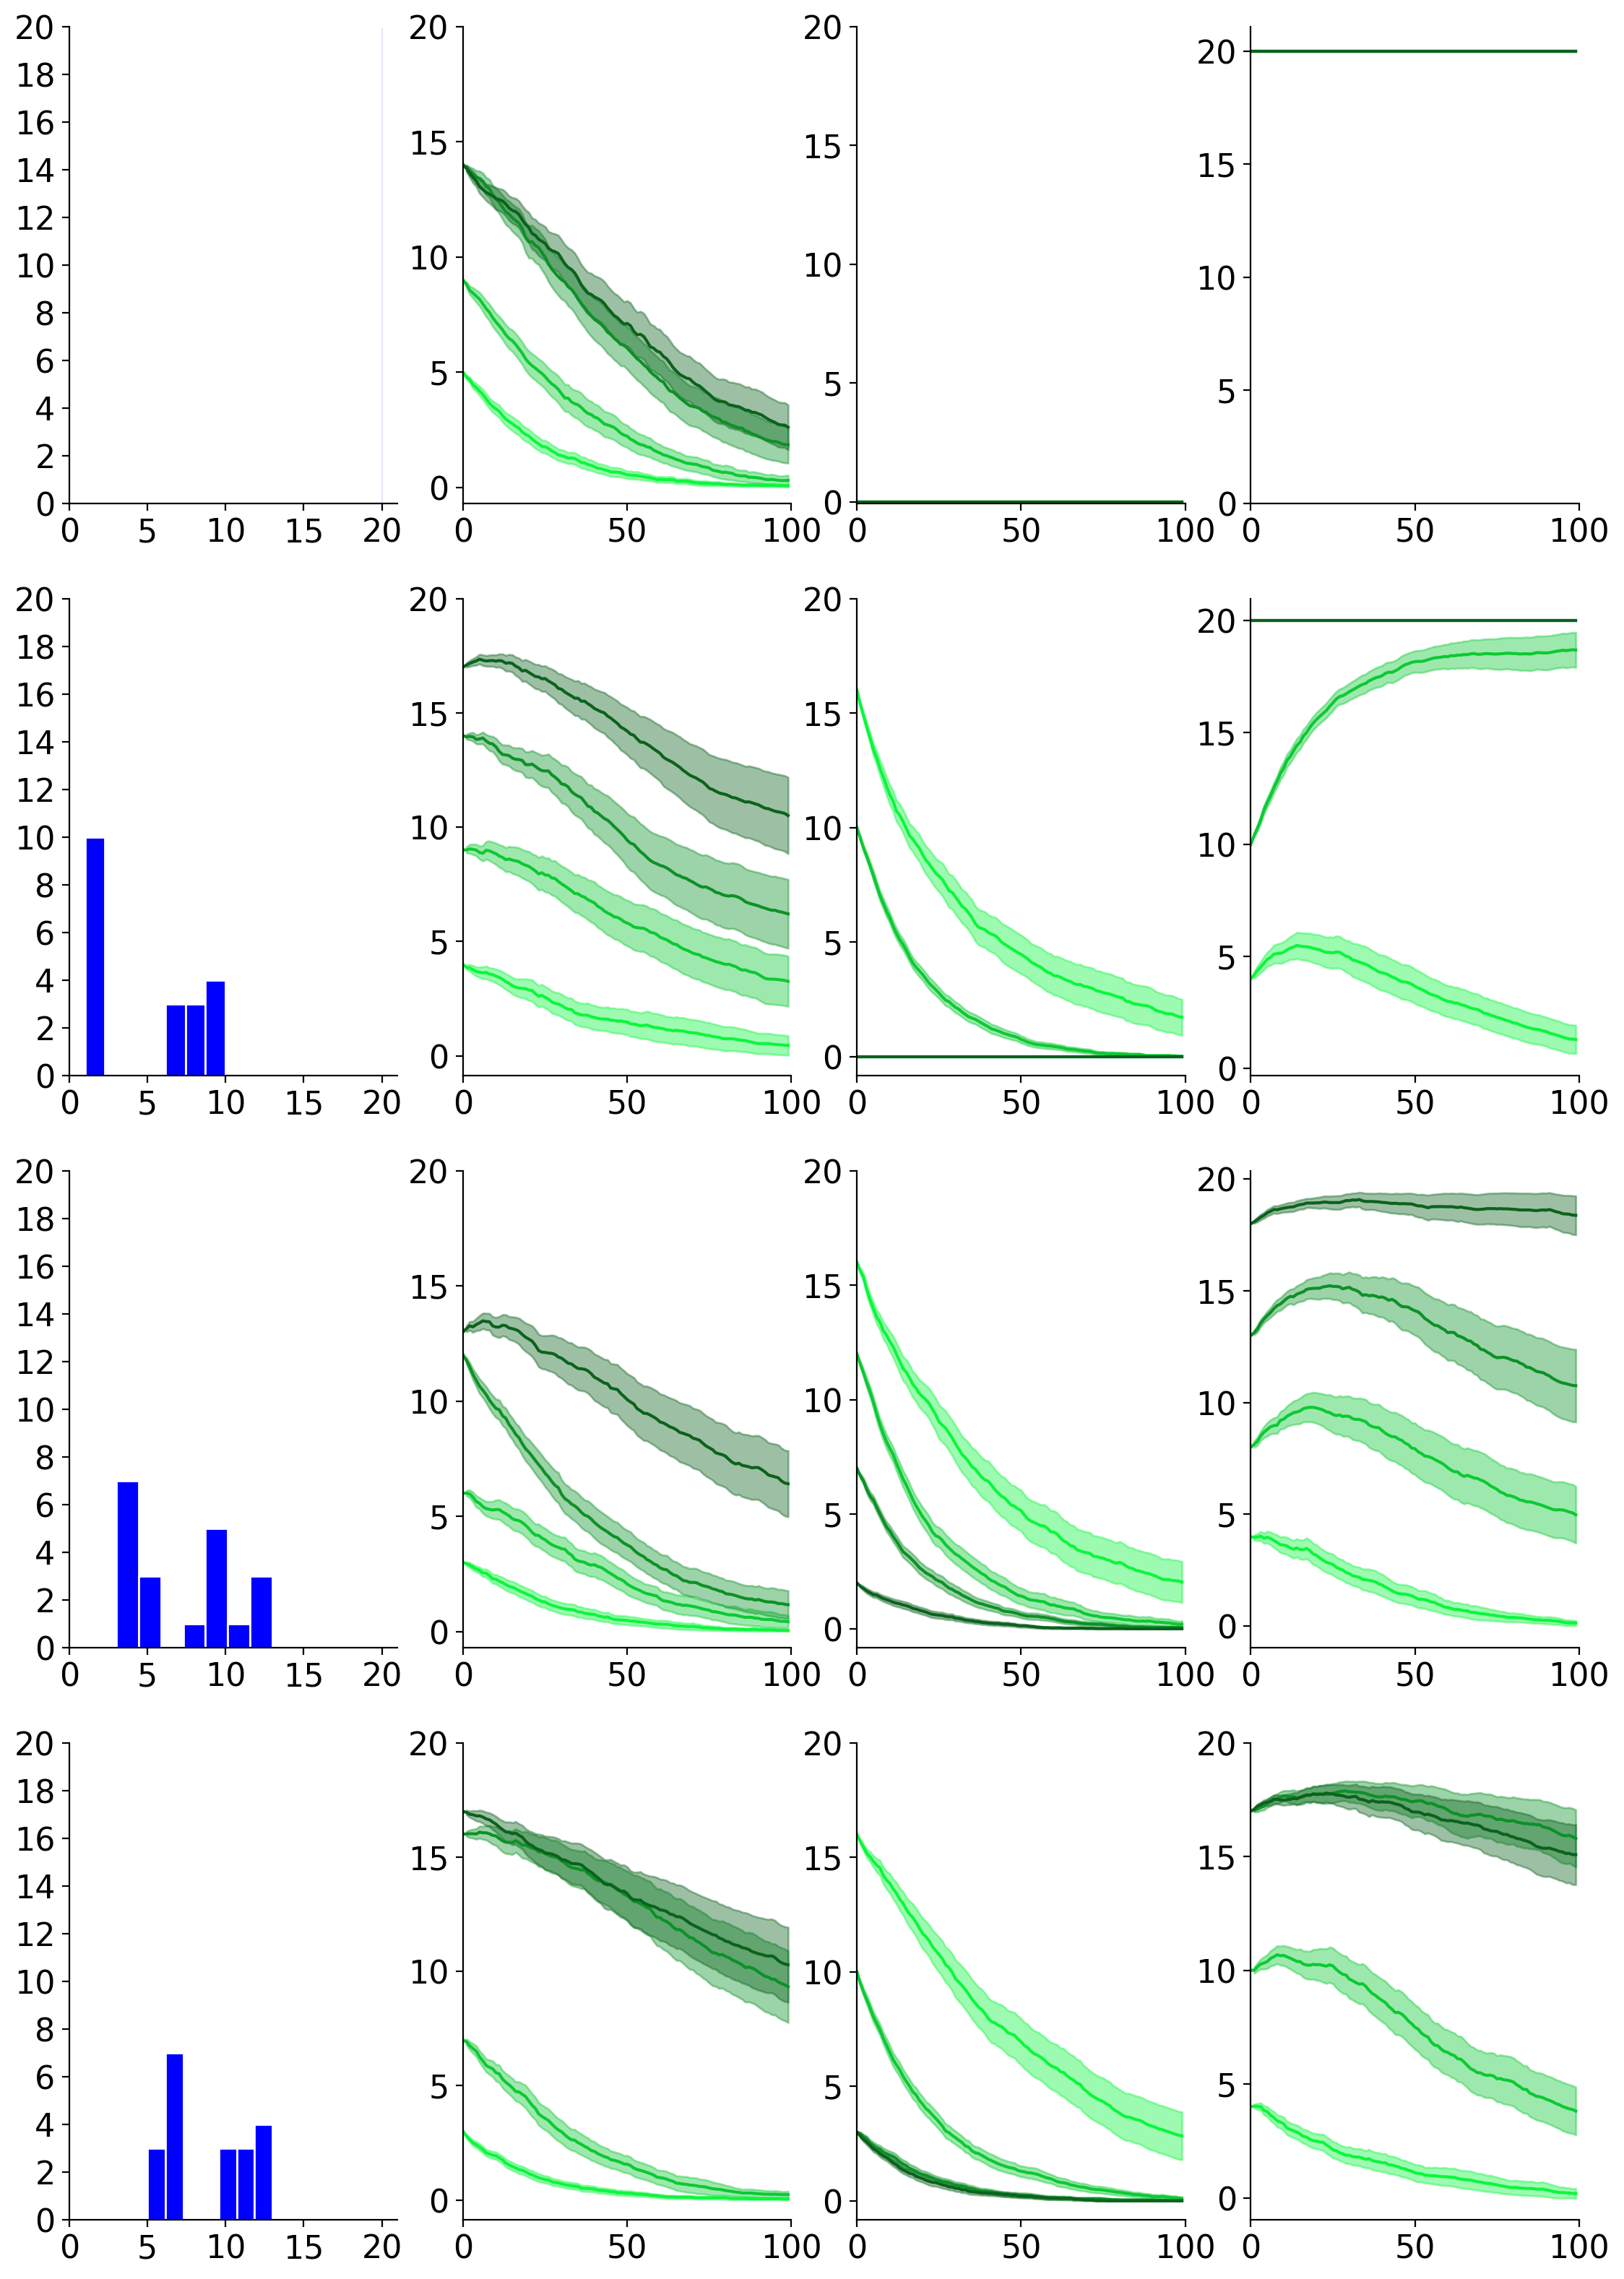

In [468]:
n_gen = 300
gs = gridspec.GridSpec(4, 4, plt.figure(figsize = (20,25), dpi=200))

y = 0
for InteractionGraph in [ domine1ami, domine5amis, domine9amis,graphcomplet,] : #    domine11amis,] :
    x = 0
    
    #histogram
    ax = plt.subplot(gs[x,y])
    plt.hist(get_interaction_degree(InteractionGraph), 7 ,edgecolor = 'white', color = "#6697be")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlim(0, 21)
    ax.set_xticks([0,5,10,15,20])
    ax.set_xticklabels([0,5,10,15,20], fontsize=16)
    ax.set_ylim(0, n)
    ax.set_yticks([0,2,4,6,8,10,12,14,16,18,20])
    ax.set_yticklabels([0,2,4,6,8,10,12,14,16,18,20], fontsize=16)
    ax.set_facecolor("white")
    x+=1
    
    #random with different proportions
    distrib_names = ["StratRD","Stratd", "StratD",]
    if InteractionGraph == graphcomplet :
        distrib_names = ["StratRD"]
    for s in distrib_names :
        for prop in [0.25,0.50,0.75] :
            ax = plt.subplot(gs[x,y])
            big_function(n_gen, n, GainMatrix, InteractionGraph, s, ax, prop)
        x+=1
    y+=1

    
### X axis ###
plt.subplot(gs[0,0]).set_xlabel("Interaction degree", fontsize = "18")
plt.subplot(gs[0,1]).set_xlabel("Interaction degree", fontsize = "18")
plt.subplot(gs[0,2]).set_xlabel("Interaction degree", fontsize = "18")
plt.subplot(gs[0,3]).set_xlabel("Interaction degree", fontsize = "18")

#plt.subplot(gs[3,0]).set_xlabel("Round number", fontsize = "16")
plt.subplot(gs[3,0]).set_xlabel("Round number", fontsize = "18")
plt.subplot(gs[3,1]).set_xlabel("Round number", fontsize = "18")
plt.subplot(gs[3,2]).set_xlabel("Round number", fontsize = "18")
plt.subplot(gs[1,3]).set_xlabel("Round number", fontsize = "18")

### Y axis ###
plt.subplot(gs[0,0]).set_ylabel("Number of individuals", fontsize = "18")
#plt.subplot(gs[0,1]).set_ylabel("Number of individuals", fontsize = "16")
#plt.subplot(gs[0,2]).set_ylabel("Number of individuals", fontsize = "16")
#plt.subplot(gs[0,3]).set_ylabel("Number of individuals", fontsize = "16")

#plt.subplot(gs[0,0]).set_ylabel("Proportion of cooperators", fontsize = "16")
plt.subplot(gs[1,0]).set_ylabel("Proportion of cooperators", fontsize = "18")
plt.subplot(gs[2,0]).set_ylabel("Proportion of cooperators", fontsize = "18")
plt.subplot(gs[3,0]).set_ylabel("Proportion of cooperators", fontsize = "18")

### Titles

#plt.subplot(gs[0,0]).set_title("Interaction degree \n distribution", fontsize = "20", rotation = 'vertical', rotation_mode = 'anchor', verticalalignment = 'baseline')
#plt.subplot(gs[1,0]).set_title("Random distribution \n of strategies", fontsize = "20", rotation = 'vertical')
#plt.subplot(gs[2,0]).set_title("Dominant individuals \n are defectors", fontsize = "20", rotation = 'vertical')
#plt.subplot(gs[3,0]).set_title("Dominant individuals \n are cooperative", fontsize = "20", rotation = 'vertical')

art1 = [plt.Line2D((0,1),(0,0), color='#b4c0c9', marker='', linewidth=3, linestyle='-', markersize=12, markerfacecolor="White"),
plt.Line2D((0,1),(0,0), color='#6697be', marker='',linewidth=3, linestyle='-', markersize=12, markerfacecolor="White"),
plt.Line2D((0,1),(0,0), color='#2f3982', marker='',linewidth=3, linestyle='-', markersize=12, markerfacecolor="White"),]
art2 = [plt.Line2D((0,1),(0,0), color='#0cf63c', marker='',linewidth=3, linestyle='-', markersize=12, markerfacecolor="White"),
plt.Line2D((0,1),(0,0), color='#0cc933', marker='',linewidth=3, linestyle='-', markersize=12, markerfacecolor="White"),
plt.Line2D((0,1),(0,0), color='#0c9127', marker='',linewidth=3, linestyle='-', markersize=12, markerfacecolor="White")]

axleg1 = plt.subplot(gs[3,3])

axleg1.legend(
    art1, 
    ["25% dominants", "50% dominants",  "75% dominants",],
    ncol=1, 
    frameon=False,
    fontsize=20, 
    loc = 'center',
    #title = 'Test',
)

axleg2 = plt.subplot(gs[2,3])

axleg2.legend(
    art2, 
    ["25% cooperators", "50% cooperators",  "75% cooperators",],
    ncol=1, 
    frameon=False,
    fontsize=20, 
    loc = 'center',
    #title = 'Test',
)

for ax in [axleg1, axleg2]:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_xticks([])
    ax.set_xticklabels([], fontsize=16)
    ax.set_yticks([])
    ax.set_yticklabels([], fontsize=16)

plt.savefig("figggggg.png", transparent = True)

In [ ]:
#Legend visualisation

art = [plt.Line2D((0,1),(0,0), color='#b4c0c9', marker='', linestyle='-', markersize=12, markerfacecolor="White"),
plt.Line2D((0,1),(0,0), color='#6697be', marker='', linestyle='-', markersize=12, markerfacecolor="White"),
plt.Line2D((0,1),(0,0), color='#2f3982', marker='', linestyle='-', markersize=12, markerfacecolor="White"),
plt.Line2D((0,1),(0,0), color='#0cf63c', marker='', linestyle='-', markersize=12, markerfacecolor="White"),
plt.Line2D((0,1),(0,0), color='#0cc933', marker='', linestyle='-', markersize=12, markerfacecolor="White"),
plt.Line2D((0,1),(0,0), color='#0c9127', marker='', linestyle='-', markersize=12, markerfacecolor="White")]

plt.figure(dpi = 200)
plt.legend(
    art, 
    ["25% dominants", "50% dominants",  "75% dominants", "25% cooperators", "50% cooperators",  "75% cooperators",],
    ncol=1, 
    frameon=False,
    fontsize=12, 
    #title = 'Test',
)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_xticks([])
ax.set_xticklabels([], fontsize=16)
ax.set_yticks([])
ax.set_yticklabels([], fontsize=16)

## Graph visualisation trough time

In [198]:
def color_by_strategy(g,strat,pos):
    """
    entries: a graph, a list of strategies, and a parameter for graph visualisation (pos)
    return: a graph darwing with cooperative individuals nodes colored in blue and defective ones in red
    """
    fig, ax = plt.subplots()
    
    # nodes
    nodes = list(g.nodes())
    nodes_coop=[]
    nodes_def=[]
    for i in range(len(strat)):
        if strat[i]=='strat_coop':
            nodes_coop.append(nodes[i])
        else:
            nodes_def.append(nodes[i])
    
    #Position of nodes 
    degrees = g.degree() #Dict with Node ID, Degree
    degrees_array = np.asarray([degrees[n] for n in nodes])
    
    
    options = {"edgecolors": "tab:gray", "node_size": 200, "alpha": 1}
    nx.draw_networkx_nodes(g, pos, nodelist=nodes_def, ax=ax, node_color="tab:red", **options)
    nx.draw_networkx_nodes(g, pos, nodelist=nodes_coop, ax=ax, node_color="tab:blue", **options)

    # edges
    nx.draw_networkx_edges(g, pos, width=1.0, alpha=0.5)

    plt.axis("off")
    


In [173]:
#Initial distribution of strategies
Strat0 = get_distribution("StratD", 0.5, n, get_interaction_degree(domine1ami))
print(Strat0)

[<function strat_coop at 0x000001C86E83C550>, <function strat_coop at 0x000001C86E83C550>, <function strat_coop at 0x000001C86E83C550>, <function strat_coop at 0x000001C86E83C550>, <function strat_coop at 0x000001C86E83C550>, <function strat_coop at 0x000001C86E83C550>, <function strat_coop at 0x000001C86E83C550>, <function strat_coop at 0x000001C86E83C550>, <function strat_coop at 0x000001C86E83C550>, <function strat_coop at 0x000001C86E83C550>, <function strat_def at 0x000001C876D3DFC0>, <function strat_def at 0x000001C876D3DFC0>, <function strat_def at 0x000001C876D3DFC0>, <function strat_def at 0x000001C876D3DFC0>, <function strat_def at 0x000001C876D3DFC0>, <function strat_def at 0x000001C876D3DFC0>, <function strat_def at 0x000001C876D3DFC0>, <function strat_def at 0x000001C876D3DFC0>, <function strat_def at 0x000001C876D3DFC0>, <function strat_def at 0x000001C876D3DFC0>]


<Figure size 3400x6000 with 0 Axes>

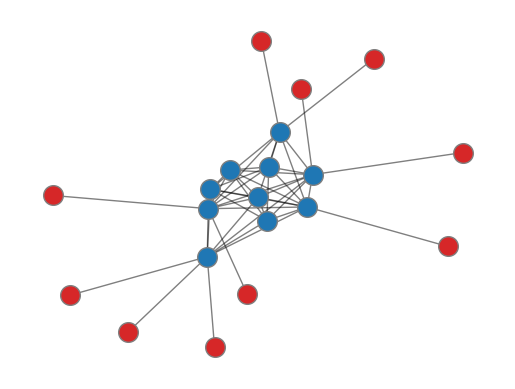

0


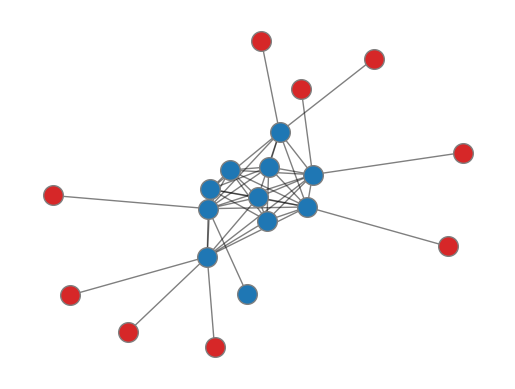

1


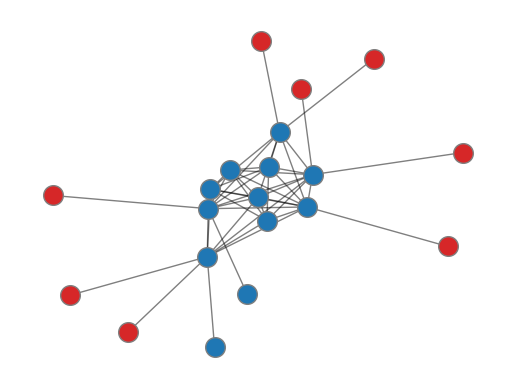

2


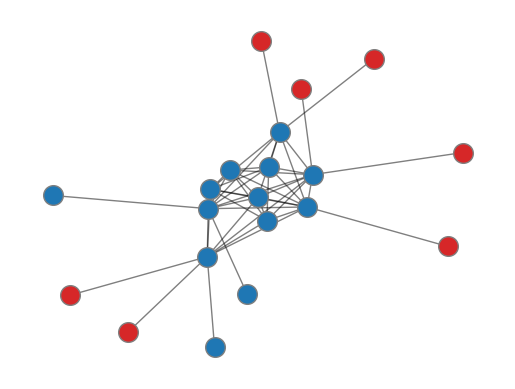

3


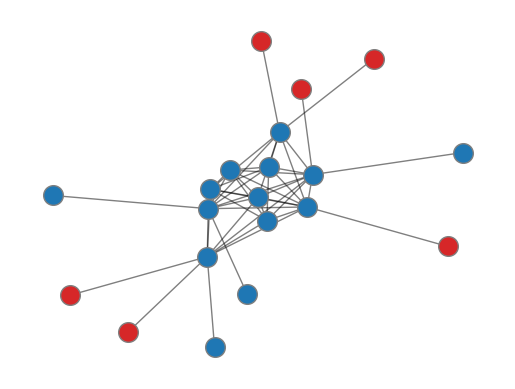

4


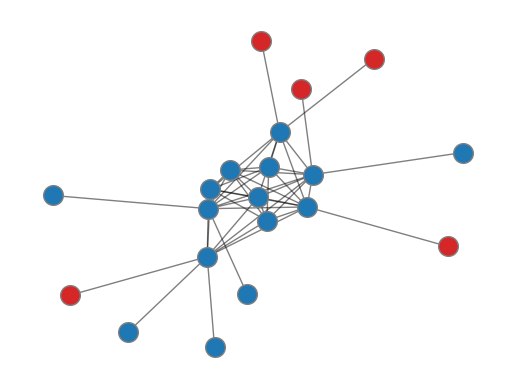

6


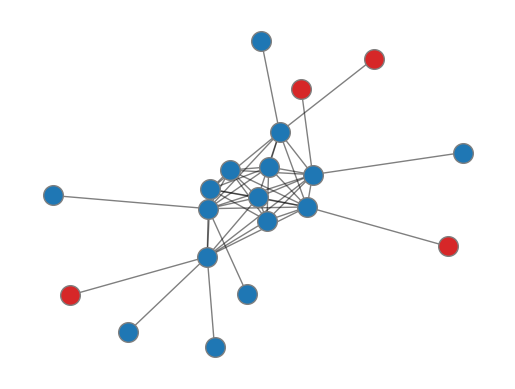

10


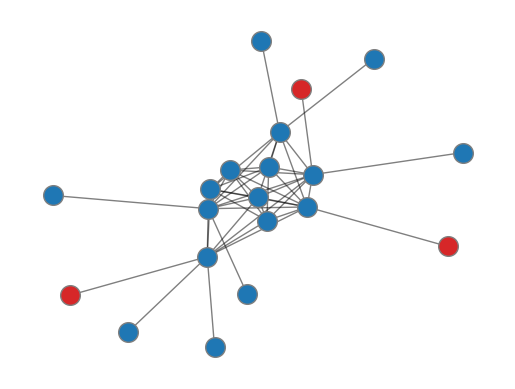

16


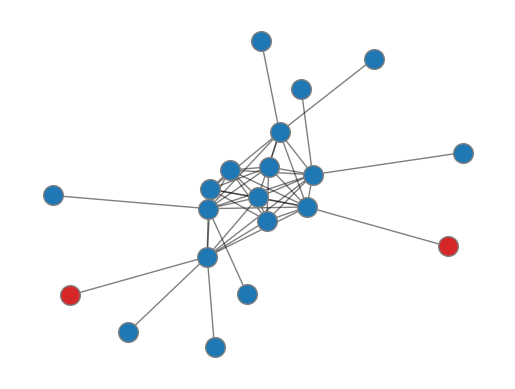

26


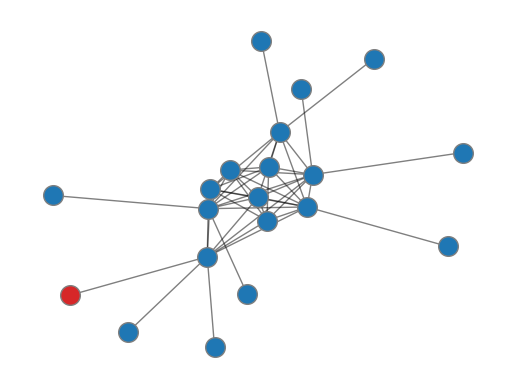

48


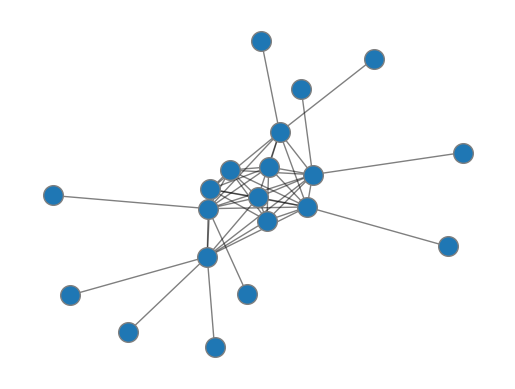

100


IndexError: list index out of range

In [182]:
#Visualisation of the graph for the n first rounds
n=100
pos=nx.fruchterman_reingold_layout(config_graph[0])
liststrat, listgain = EvolPop(n, 20, MatriceSup, domine1ami, Strat0)
liststrat.append('end')
for i in range(len(liststrat)):
    if liststrat[i]!=liststrat[i+1]:
        color_by_strategy(config_graph[0], liststrat[i],pos)
        print(i)

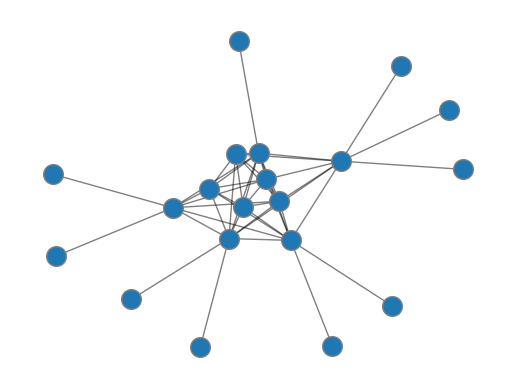

In [207]:
#Save the wanted graph
color_by_strategy(config_graph[0], liststrat[70],pos)
plt.savefig("round70")

# Quantitative study

We create 10 graphs of each type (the degree of dominated varying from 1 to 11) for the quantitative study

In [24]:
#Configuration model graph creation
def config(seq):
    g=nx.configuration_model(seq)
    while nx.number_connected_components(g)>1: 
        g=nx.configuration_model(seq)     
    g = nx.Graph(g)
    g.remove_edges_from(nx.selfloop_edges(g))
    return(g)

In [25]:
#100 different graphs with a dominated individeuals degree varying from 1 to 11
config_graph_h=[]
for k in range(10):
    for _ in range(10):
        config_graph_h.append(config([19 for i in range(10)]+[k+1 for i in range(10)]))

In [26]:
degrees_h=[]
for g in range(len(config_graph_h)):
    degrees_h.append(config_graph_h[g].degree())
    degrees_h[g]=list(itertools.chain(*degrees_h[g]))
    degrees_h[g]=[degrees_h[g][i] for i in range (1,len(degrees_h[g]),2)]
#print(degrees_h)

H parameter computation

In [28]:
H=[]
for g in range(len(degrees_h)):
    H.append(1-(np.mean([degrees_h[g][i] for i in range(10,20)])/np.mean([degrees_h[g][i] for i in range(10)])))
#print(H)

[0.8863636363636364, 0.8837209302325582, 0.8809523809523809, 0.8837209302325582, 0.8863636363636364, 0.8888888888888888, 0.8809523809523809, 0.8837209302325582, 0.8809523809523809, 0.8863636363636364, 0.7865168539325843, 0.7777777777777778, 0.8041237113402062, 0.7872340425531915, 0.8, 0.7916666666666666, 0.8080808080808081, 0.8041237113402062, 0.7826086956521738, 0.8125, 0.7070707070707071, 0.74, 0.7045454545454546, 0.7128712871287128, 0.7254901960784313, 0.6881720430107527, 0.6956521739130435, 0.7157894736842105, 0.7346938775510203, 0.7216494845360824, 0.6666666666666666, 0.6470588235294117, 0.6346153846153846, 0.6956521739130435, 0.6851851851851852, 0.6538461538461539, 0.6415094339622642, 0.6476190476190475, 0.6470588235294117, 0.6730769230769231, 0.5765765765765766, 0.625, 0.5849056603773584, 0.5714285714285714, 0.6037735849056604, 0.6017699115044248, 0.54, 0.6095238095238096, 0.5714285714285714, 0.5858585858585859, 0.5486725663716815, 0.4948453608247422, 0.5454545454545454, 0.56074

Adjency matrix

In [29]:
ADJ_MATRIX_H=[]
for k in range(len(config_graph_h)):
    ADJ_MATRIX_H.append(nx.to_numpy_array(config_graph_h[k]).tolist())
print(ADJ_MATRIX_H[1])

[[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [32]:
def final_coop_prop(n_gen, n, MatriceSup, InteractionGraph, s, prop, get_interaction_degree):
    '''
    entries: number of generation, number of individuals, game matrix, interaction graph, initial strategy distribution 
    (s, random, dominants cooperators or dominants defectors), proportion of cooperators, function to extract degrees
    return: run 100 simulations, and return the mean of the number of cooperators after n_gen, ie the cooperation fixation proba
    '''
    
    list_label = ['strat_coop']
    n_indiv_start=[]

    for _ in range(100) : 
        Strat0 = get_distribution(s, prop, n, get_interaction_degree(InteractionGraph))
        liststrat, listgain = EvolPop(n_gen, n, MatriceSup, InteractionGraph, Strat0)
        for label in list_label :
            n_indiv_start.append(sum(list(map(lambda x : int(x == label),list(liststrat[-1])))))

    result = {'strategie':[], 'mean' :[]}
    for label in list_label :
        moy = []
        moy.append(np.mean(n_indiv_start))
        result['strategie'].append(label)
        result['mean'].append(moy)
        
    return(result)

In [33]:
final_coop_prop(300,20,MatriceSup,ADJ_MATRIX_H[0],"StratRD",0.5, get_interaction_degree)

{'strategie': ['strat_coop'], 'mean': [[1.6]]}

In [34]:
#random 50% coop at the beginning
FINAL_COOP_PROP_RD_10=[]
for g in ADJ_MATRIX_H:
    FINAL_COOP_PROP_RD_10.append(final_coop_prop(300,20,MatriceSup,g,"StratRD",0.5, get_interaction_degree))

In [35]:
#random 75% coop at the beginning
FINAL_COOP_PROP_RD_15=[]
for g in ADJ_MATRIX_H:
    FINAL_COOP_PROP_RD_15.append(final_coop_prop(300,20,MatriceSup,g,"StratRD",0.75, get_interaction_degree))

In [36]:
#dominants coop 50% coop at the beginning
FINAL_COOP_PROP_D_10=[]
for g in ADJ_MATRIX_H:
    FINAL_COOP_PROP_D_10.append(final_coop_prop(300,20,MatriceSup,g,"StratD",0.5, get_interaction_degree))

In [37]:
#domiants coop 75% coop at the beginning
FINAL_COOP_PROP_D_15=[]
for g in ADJ_MATRIX_H:
    FINAL_COOP_PROP_D_15.append(final_coop_prop(300,20,MatriceSup,g,"StratD",0.75, get_interaction_degree))

In [38]:
#extract mean
FINAL_COOP_PROP_RD_10_MEAN=[FINAL_COOP_PROP_RD_10[i]['mean'] for i in range(len(FINAL_COOP_PROP_RD_10))]
FINAL_COOP_PROP_RD_10_MEAN=[l[0][0] for l in FINAL_COOP_PROP_RD_10_MEAN]
print(FINAL_COOP_PROP_RD_10_MEAN)

[2.63, 0.8, 1.4, 1.2, 1.6, 2.6, 1.0, 0.8, 1.0, 0.4, 1.41, 0.0, 0.6, 0.6, 1.0, 0.4, 1.4, 0.4, 0.8, 1.6, 0.8, 0.2, 1.0, 1.4, 1.0, 1.4, 0.79, 0.61, 1.6, 0.8, 1.0, 0.4, 0.8, 0.4, 1.4, 0.6, 0.4, 1.0, 0.6, 0.4, 0.4, 0.6, 1.2, 0.8, 0.8, 0.41, 0.5, 1.0, 0.6, 0.22, 0.2, 0.8, 0.8, 0.2, 0.2, 0.2, 0.8, 1.05, 0.6, 0.0, 0.0, 1.2, 0.4, 0.0, 0.0, 0.4, 0.0, 1.0, 0.2, 0.4, 0.23, 0.6, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2, 0.4, 0.41, 0.0, 0.6, 0.0, 0.6, 0.2, 0.4, 0.4, 0.2, 0.4, 0.47, 0.6, 0.2, 0.0, 0.0, 0.4, 0.6, 0.2, 0.2, 0.0, 0.0]


In [39]:
#extract mean
FINAL_COOP_PROP_RD_15_MEAN=[FINAL_COOP_PROP_RD_15[i]['mean'] for i in range(len(FINAL_COOP_PROP_RD_15))]
FINAL_COOP_PROP_RD_15_MEAN=[l[0][0] for l in FINAL_COOP_PROP_RD_15_MEAN]
print(FINAL_COOP_PROP_RD_15_MEAN)

[5.65, 4.2, 7.01, 4.81, 8.42, 5.2, 7.21, 6.22, 6.8, 7.0, 6.6, 5.25, 6.8, 6.4, 4.0, 6.8, 4.6, 7.4, 6.81, 7.0, 4.2, 3.4, 5.0, 5.84, 4.2, 4.39, 5.61, 4.2, 5.0, 6.4, 4.2, 5.0, 4.8, 5.01, 5.6, 4.6, 3.6, 4.75, 3.02, 5.2, 3.8, 4.6, 3.2, 4.76, 4.22, 4.0, 4.61, 4.6, 3.81, 6.55, 3.8, 3.48, 2.4, 3.8, 3.6, 3.2, 4.41, 3.61, 3.6, 4.61, 3.61, 3.8, 3.02, 3.6, 4.0, 3.4, 4.28, 3.22, 3.06, 3.8, 3.3, 2.21, 3.02, 3.41, 2.95, 2.4, 2.63, 3.64, 2.8, 2.61, 3.2, 3.0, 3.41, 2.6, 3.8, 2.4, 2.8, 4.0, 3.6, 3.85, 2.41, 3.01, 2.6, 4.0, 2.8, 2.61, 3.23, 2.62, 2.0, 2.0]


In [40]:
#extract mean
FINAL_COOP_PROP_D_10_MEAN=[FINAL_COOP_PROP_D_10[i]['mean'] for i in range(len(FINAL_COOP_PROP_D_10))]
FINAL_COOP_PROP_D_10_MEAN=[l[0][0] for l in FINAL_COOP_PROP_D_10_MEAN]
print(FINAL_COOP_PROP_D_10_MEAN)

[17.4, 17.84, 18.4, 18.6, 18.0, 17.8, 16.87, 18.2, 18.08, 17.4, 13.21, 13.4, 13.6, 15.25, 14.6, 13.0, 15.2, 14.4, 14.26, 13.6, 10.82, 9.4, 10.02, 8.4, 11.41, 9.98, 8.59, 8.61, 11.6, 10.23, 6.27, 8.4, 5.4, 7.41, 9.04, 6.39, 8.6, 7.82, 8.34, 6.6, 5.8, 6.2, 5.06, 4.4, 5.6, 4.41, 3.03, 7.21, 4.4, 3.41, 3.0, 4.0, 4.38, 3.69, 3.64, 2.82, 3.6, 3.81, 4.41, 3.6, 2.43, 1.65, 2.8, 0.46, 3.0, 3.57, 1.8, 2.6, 2.2, 1.41, 1.0, 1.0, 3.2, 1.0, 1.6, 1.49, 1.22, 2.82, 3.56, 1.64, 2.61, 8.87, 3.63, 0.81, 1.6, 1.95, 1.21, 0.8, 0.23, 1.0, 1.0, 0.63, 0.4, 3.2, 0.8, 0.4, 3.03, 0.0, 2.01, 2.21]


In [41]:
#extract mean
FINAL_COOP_PROP_D_15_MEAN=[FINAL_COOP_PROP_D_15[i]['mean'] for i in range(len(FINAL_COOP_PROP_D_15))]
FINAL_COOP_PROP_D_15_MEAN=[l[0][0] for l in FINAL_COOP_PROP_D_15_MEAN]
print(FINAL_COOP_PROP_D_15_MEAN)

[20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.4, 20.0, 19.8, 20.0, 20.0, 20.0, 19.8, 19.87, 20.0, 20.0, 19.8, 17.81, 17.01, 19.4, 20.0, 19.2, 18.6, 18.8, 17.0, 17.8, 15.5, 16.0, 18.6, 16.41, 20.0, 15.6, 17.6, 16.6, 13.9, 18.4, 14.63, 16.0, 12.8, 17.6, 18.4, 13.43, 10.4, 17.2, 12.03, 18.4, 17.8, 16.8, 18.4, 13.38, 15.0, 14.71, 15.22, 15.6, 14.4, 15.0, 11.82, 10.6, 9.9, 15.09, 11.6, 12.42, 20.0, 11.63, 14.41, 11.82, 14.21, 15.6, 8.82, 14.64, 5.43, 13.23, 18.21, 15.21, 6.0, 11.01, 5.8, 10.27, 9.48, 8.84, 16.4, 9.79, 16.6, 16.8, 20.0, 7.62, 8.2, 8.6, 7.37, 6.4, 6.82, 4.6, 7.41, 11.6, 11.38, 7.62]


[0.08958165]
[0.32889299]
[1.46770169]
[1.00502151]


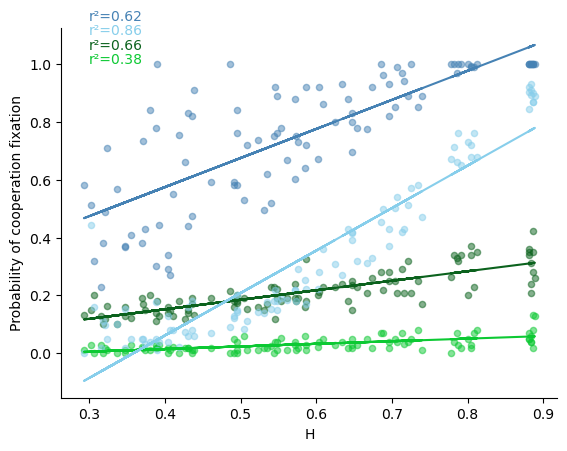

In [46]:
#Visualisation function
#We plot probability of cooperation fixation against H
x=np.array(H).reshape(-1, 1)

y10rd=[FINAL_COOP_PROP_RD_10_MEAN[i]/20 for i in range(len(list(FINAL_COOP_PROP_RD_10_MEAN)))]
y15rd=[FINAL_COOP_PROP_RD_15_MEAN[i]/20 for i in range(len(list(FINAL_COOP_PROP_RD_15_MEAN)))]
y10d=[FINAL_COOP_PROP_D_10_MEAN[i]/20 for i in range(len(list(FINAL_COOP_PROP_D_10_MEAN)))]
y15d=[FINAL_COOP_PROP_D_15_MEAN[i]/20 for i in range(len(list(FINAL_COOP_PROP_D_15_MEAN)))]

#Linear regressions
lm10rd = linear_model.LinearRegression() 
lm10rd.fit(x, y10rd)
lm15rd = linear_model.LinearRegression()
lm15rd.fit(x, y15rd)
lm10d = linear_model.LinearRegression()
lm10d.fit(x, y10d)
lm15d = linear_model.LinearRegression()
lm15d.fit(x, y15d)

#Slopes
print(lm10rd.coef_)
print(lm15rd.coef_)
print(lm10d.coef_)
print(lm15d.coef_)

#Points
plt.scatter(x,y10rd,alpha=0.5, s=20, color='#0cc933')
plt.scatter(x,y15rd,alpha=0.5, s=20, color="#0b621d")
plt.scatter(x,y10d,alpha=0.5, s=20, color='skyblue')
plt.scatter(x,y15d,alpha=0.5, s=20, color="steelblue")

y_pred10rd = lm10rd.predict(x)
y_pred15rd = lm15rd.predict(x)
y_pred10d = lm10d.predict(x)
y_pred15d = lm15d.predict(x)

#Regression lines
plt.plot(x, y_pred10rd, color='#0cc933')
plt.plot(x, y_pred15rd, color="#0b621d")
plt.plot(x, y_pred10d, color='skyblue')
plt.plot(x, y_pred15d, color="steelblue")

#Coefficient of determination
plt.text(x=0.3,y=1,s="r²="+str(round(lm10rd.score(x,y10rd),2)),color= '#0cc933')
plt.text(x=0.3,y=1.05,s="r²="+str(round(lm15rd.score(x,y15rd),2)),color= "#0b621d")
plt.text(x=0.3,y=1.1,s="r²="+str(round(lm10d.score(x,y10d),2)),color= 'skyblue')
plt.text(x=0.3,y=1.15,s="r²="+str(round(lm15d.score(x,y15d),2)),color= "steelblue")

plt.xlabel("H")
plt.ylabel("Probability of cooperation fixation")


plt.savefig('hierarchy.png', transparent=True)

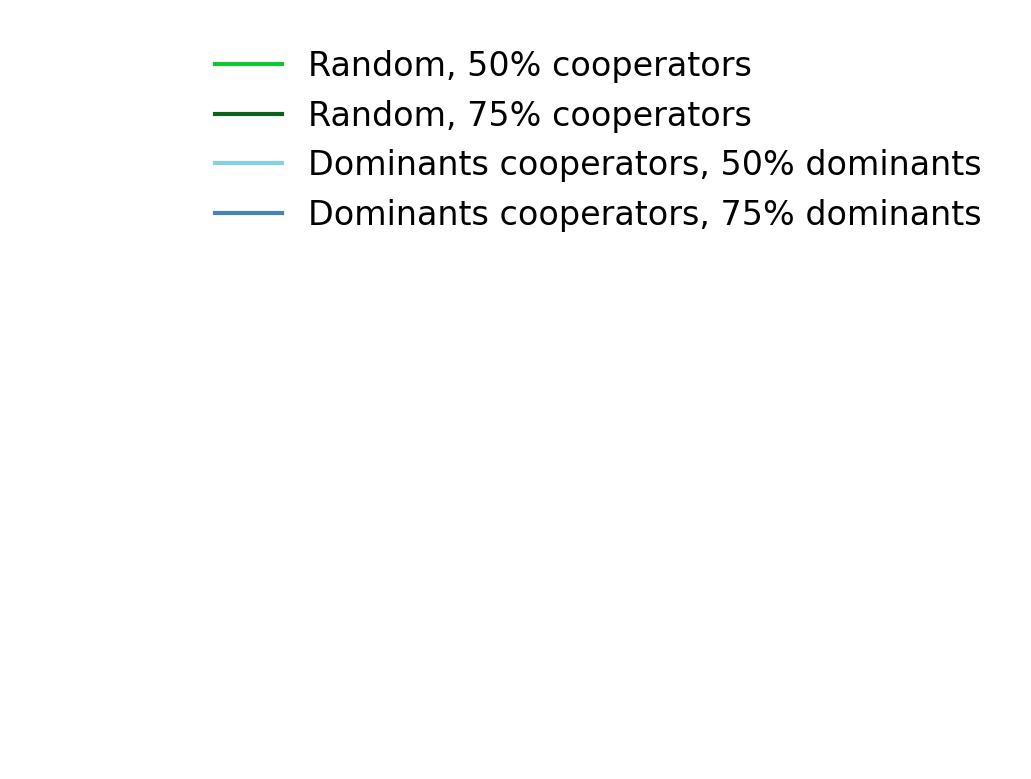

In [45]:
#Legend visualisation
art = [plt.Line2D((0,1),(0,0), color='#0cc933', marker='', linestyle='-', markersize=12, markerfacecolor="White"),
plt.Line2D((0,1),(0,0), color="#0b621d", marker='', linestyle='-', markersize=12, markerfacecolor="White"),
plt.Line2D((0,1),(0,0), color='skyblue', marker='', linestyle='-', markersize=12, markerfacecolor="White"),
plt.Line2D((0,1),(0,0), color="steelblue", marker='', linestyle='-', markersize=12, markerfacecolor="White")]

plt.figure(dpi = 200)
plt.legend(
    art,
    ["Random, 50% cooperators", "Random, 75% cooperators",  "Dominants cooperators, 50% dominants", "Dominants cooperators, 75% dominants",],
    ncol=1,
    frameon=False,
    fontsize=12,
    #title = 'Test',
)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_xticks([])
ax.set_xticklabels([], fontsize=16)
ax.set_yticks([])
ax.set_yticklabels([], fontsize=16)

plt.savefig("legend.png",transparent=True)